In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
plt.style.use('default')
line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './prev_results/'

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
def aupr_auroc_prev_new(result, idx, save=None):
    
    end = 5000 + 5000*(idx+1)
    fontsize = 15
    
    precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    
    density_prev = np.zeros(100)
    density_new = np.zeros(100)
    result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_prev = result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_new = result['bin_prob'][0][idx][0][end-5000:end]
    for prob in bin_prob_prev:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_prev[i] += 1
    
    for prob in bin_prob_new:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_new[i] += 1
    
    plt.figure(figsize = (20,5))

#     plt.plot(recall, precision, linestyle='-', label='bin_prob')
#     plt.grid(b=True, which='major', axis='both')
#     plt.xlabel('Recall', fontsize=fontsize)
#     plt.ylabel('Precision', fontsize=fontsize)
#     plt.title('AURP: %.3f'%aupr, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,1)
    plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('FPR', fontsize=fontsize)
    plt.ylabel('TPR', fontsize=fontsize)
    plt.title('AUROC: %.3f'%auroc, fontsize=fontsize)
    
    plt.style.use('default')
    plt.subplot(1,4,2)
    plt.plot(np.arange(100)/100, density_prev, linestyle='-', label='prev')
    plt.plot(np.arange(100)/100, density_new, linestyle='-', label='new')
    plt.xlabel('Confidence', fontsize=fontsize)
    plt.legend(loc = 'upper left')
    plt.title('density', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,3)
    plt.plot(np.arange(end-5000), np.sort(result['bin_prob'][0][idx][0][:end-5000]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('Prev class', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,4)
    plt.plot(np.arange(5000), np.sort(result['bin_prob'][0][idx][0][end-5000:end]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('New class', fontsize=fontsize)


    print(np.mean(result['bin_prob'][0][idx][0][:end-5000]))
    print(np.mean(result['bin_prob'][0][idx][0][end-5000:end]))
    
    if save is not None:
        plt.tight_layout()
        plt.savefig('./figures/'+save+'.pdf')

In [4]:
plt.figure(figsize = (0.1,0.1))
plt.style.use('default')
plt.plot(range(5),range(5))
plt.xticks(visible=False)
plt.yticks(visible=False)

(array([-2.5,  0. ,  2.5,  5. ]), <a list of 4 Text yticklabel objects>)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.85794646 0.85727246 0.85175018]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [28. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 27. 82.  0.  0.  0.  0.  0.  0.  0.]
 [15. 18. 28. 82.  0.  0.  0.  0.  0.  0.]]
0.084360845
0.3920541


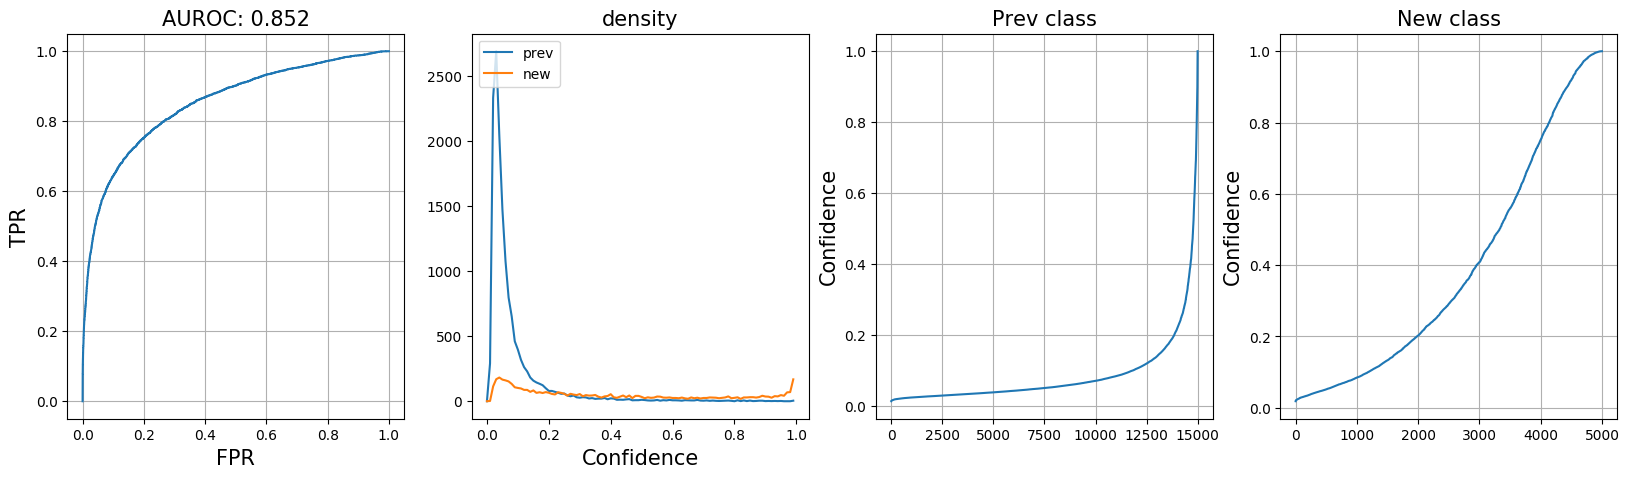

In [5]:
result = sio.loadmat(root+'original_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.8507229  0.85103951 0.85085017]]
[[83.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [23. 81.  0.  0.  0.  0.  0.  0.  0.  0.]
 [12. 23. 81.  0.  0.  0.  0.  0.  0.  0.]
 [11. 16. 25. 81.  0.  0.  0.  0.  0.  0.]]
0.05076272
0.29596928


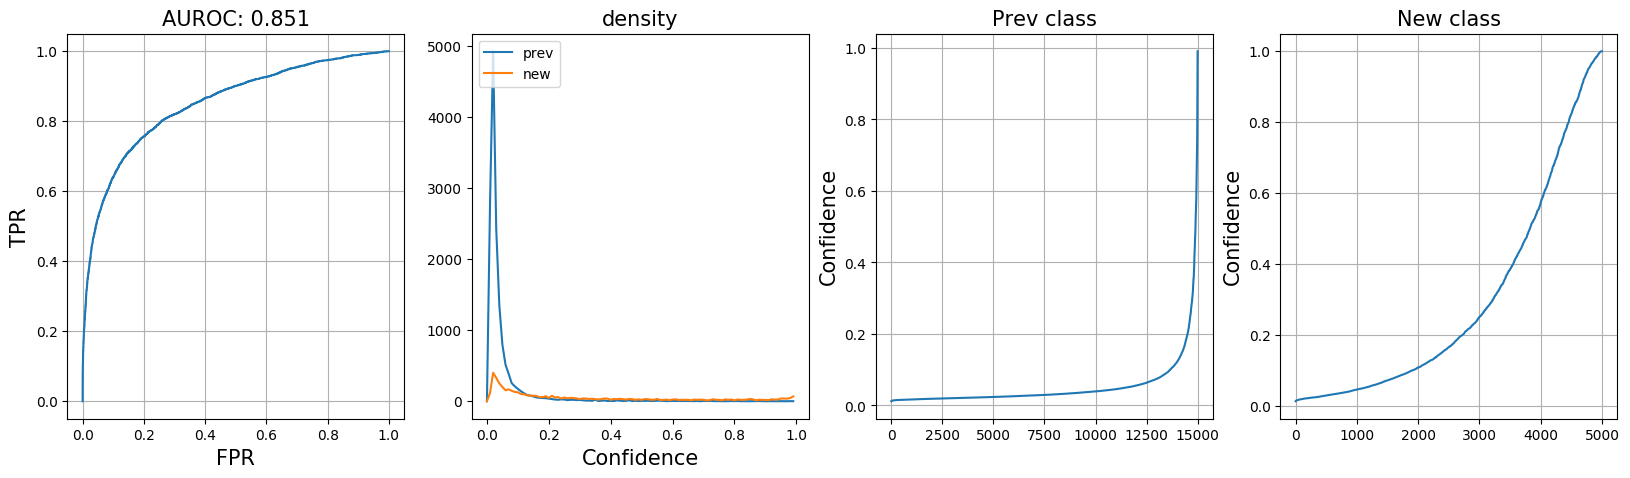

In [6]:
result = sio.loadmat(root+'original_Imagenet_ood_0_memsz_20000_alpha_1_beta_10.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.5271392
0.5097878


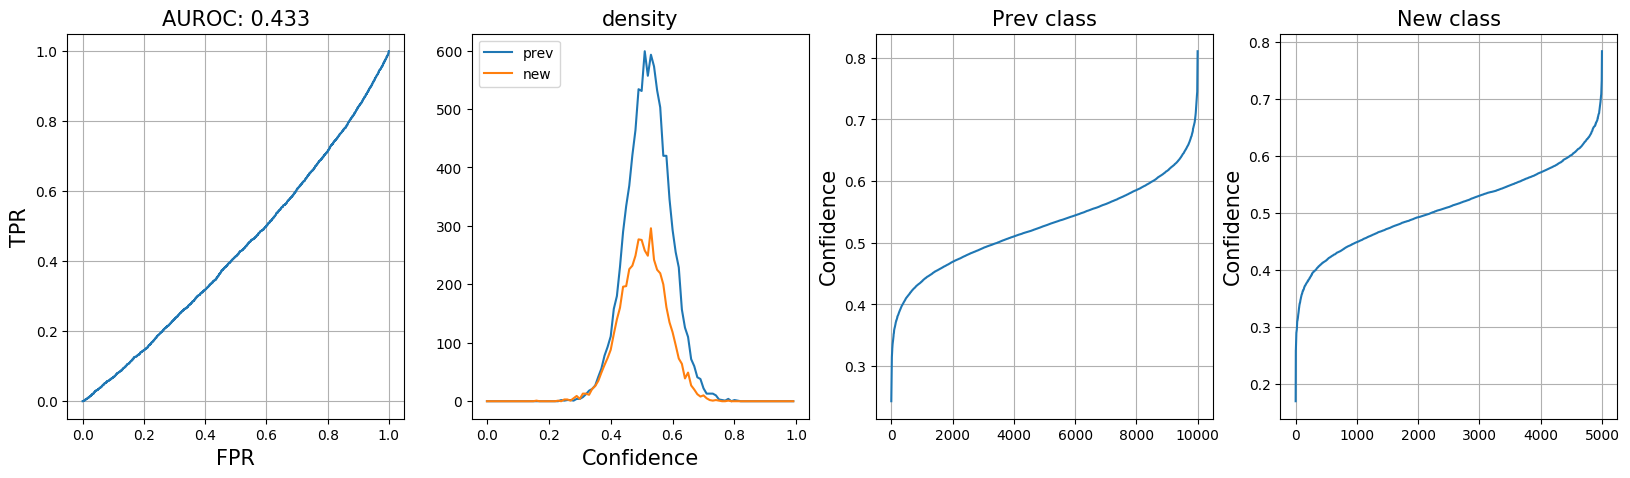

In [10]:
result = sio.loadmat('RESULT_Imagenet_bin_finetune_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_128_batch_128_epoch_100_factor_5_RingBuffer_CE.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 1

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.52350676
0.5087368


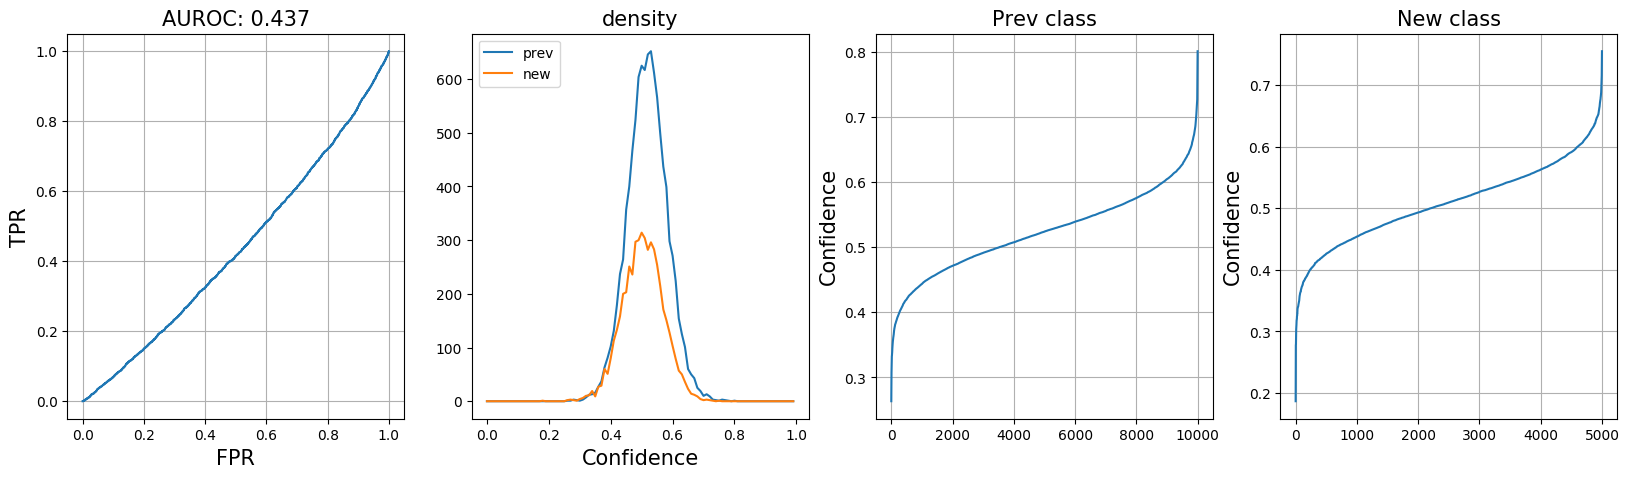

In [11]:
result = sio.loadmat('RESULT_Imagenet_bin_finetune_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_128_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 1

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)